<a href="https://colab.research.google.com/github/Kamran-Ali-Shah/Kamran-Ali-Shah/blob/main/Copy_of_project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import glob
import cv2
import random
from tensorflow.keras.optimizers import RMSprop
import shutil

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/face recognition model project/origin")))

OSError: ignored

In [ ]:
data_dir = os.listdir("/content/drive/MyDrive/face recognition model project/origin")

In [ ]:
data_dir[4000]

'resized_resized_resized_distressed_mother_246.jpg'

In [ ]:
data_dir[45370]

'awe_european_271.jpg'

In [ ]:
label_path = "/content/drive/MyDrive/face recognition model project/data/label/label.lst"

In [ ]:
image_path = "/content/drive/MyDrive/face recognition model project/origin"

In [ ]:
df = pd.read_csv(label_path, sep= " ", header=None)

In [ ]:
df


,0,1,2,3,4,5,6,7
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [ ]:
df.shape

(91793, 8)

In [ ]:
df.info

<bound method DataFrame.info of                                   0  1   2    3    4    5        6  7
0               angry_actor_104.jpg  0  28  113  226  141  22.9362  0
1               angry_actor_109.jpg  0  31  157  345  219  50.3056  0
2               angry_actor_120.jpg  1  53   53  372  372  13.9434  2
3                angry_actor_13.jpg  0  77   51  362  388  85.8104  3
4               angry_actor_132.jpg  0  95   31  412  476  82.3948  0
...                             ... ..  ..  ...  ...  ...      ... ..
91788  surprised_expression_546.jpg  0  70   70  351  351  37.7117  5
91789  surprised_expression_381.jpg  0  51   61  117  107  91.6307  5
91790  surprised_expression_395.jpg  0  27   95  258  190  96.2861  5
91791         ecstatic_asian_31.jpg  0  60  136  184  108  39.9223  3
91792  surprised_expression_394.jpg  0  47   38  152  161  77.7758  5

[91793 rows x 8 columns]>

In [ ]:
df.columns =['image_name', 'face_id_in_image', 'face_box_top', 'face_box_left', 'face_box_right', 'face_box_bottom', 'face_box_cofidence', 'expression_label']
df

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [ ]:
import os

data_dir = '/content/drive/MyDrive/face recognition model project/origin'

# List files in the directory
file_list = os.listdir(data_dir)

# Iterate over the files
for file_name in file_list:
    # Get the full path of the file
    file_path = os.path.join(data_dir, file_name)


    # Print the file name
    print(file_name)

Streaming output truncated to the last 5000 lines.
amazed_european_110.jpg
amazed_european_113.jpg
amazed_european_114.jpg
amazed_european_117.jpg
amazed_european_118.jpg
amazed_european_119.jpg
amazed_european_121.jpg
amazed_european_13.jpg
amazed_european_130.jpg
amazed_european_132.jpg
amazed_european_133.jpg
amazed_european_135.jpg
amazed_european_138.jpg
amazed_european_139.jpg
amazed_european_14.jpg
amazed_european_146.jpg
amazed_european_147.jpg
amazed_european_15.jpg
amazed_european_151.jpg
amazed_european_160.jpg
amazed_european_161.jpg
amazed_european_163.jpg
amazed_european_164.jpg
amazed_european_171.jpg
amazed_european_174.jpg
amazed_european_175.jpg
amazed_european_176.jpg
amazed_european_179.jpg
amazed_european_182.jpg
amazed_european_183.jpg
amazed_european_184.jpg
amazed_european_188.jpg
amazed_european_19.jpg
amazed_european_191.jpg
amazed_european_193.jpg
amazed_european_194.jpg
amazed_european_195.jpg
amazed_european_196.jpg
amazed_european_197.jpg
amazed_european_2

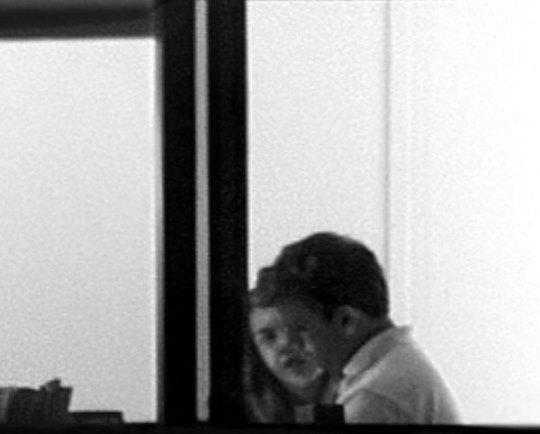

In [ ]:
image = list(glob.glob(os.path.join(data_dir,'*.jpg')))
PIL.Image.open(str(image[30000]))

In [ ]:
import os
import cv2

# File path to the folder containing face images
folder_path = "/content/drive/MyDrive/face recognition model project/origin"

# Desired size for the resized images
desired_width, desired_height = 100, 100

# Function to resize images
def resize_image(image_path, output_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (desired_width, desired_height))
    cv2.imwrite(output_path, resized_image)

# Loop through the files in the folder and resize the images
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Assuming the images are in JPG format
        image_path = os.path.join(folder_path, filename)
        output_path = os.path.join(folder_path, "resized_" + filename)
        resize_image(image_path, output_path)

In [ ]:
labels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
final_data_path="/content/drive/MyDrive/Colab Notebooks"
for lbl in labels:
  os.makedirs(os.path.join(final_data_path, lbl),exist_ok=True)
mapper={0:"angry", 1:"disgust", 2:"fear", 3:"happy", 4:"sad", 5:"surprise", 6:"neutral"}


In [ ]:
import cv2
extracted_path_folder = r"/content/drive/MyDrive/face recognition model project/origin"
final_data_path = r"/content/drive/MyDrive/Colab Notebooks"

from tqdm import tqdm
import shutil
for label in tqdm(df.expression_label.unique()):
  df_d=df[df.expression_label==label]
  emotion=mapper[label]
  for image_name in df_d.image_name:
    img_path=os.path.join(extracted_path_folder, image_name)
    if os.path.exists(img_path):
      dst_path=os.path.join(final_data_path,emotion)
      shutil.copy(img_path,dst_path)

 29%|██▊       | 2/7 [21:09<47:26, 569.32s/it]   

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Replace with your dataset directory
data_directory = "/content/drive/MyDrive/face recognition model project/origin"

# Replace with the destination directory where split data will be saved
destination_directory = "/content/drive/MyDrive/face recognition model project/split_data"

# Define split ratios
train_ratio = 0.7
test_ratio = 0.15
validation_ratio = 0.15

# List all image filenames in the dataset directory
all_images = os.listdir(data_directory)

# Shuffle the list of images
random.shuffle(all_images)

# Split data into training, testing, and validation sets
train_images, test_valid_images = train_test_split(all_images, train_size=train_ratio, random_state=42)
test_images, validation_images = train_test_split(test_valid_images, train_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

# Create directories to store the split data
os.makedirs(os.path.join(destination_directory, "train"), exist_ok=True)
os.makedirs(os.path.join(destination_directory, "test"), exist_ok=True)
os.makedirs(os.path.join(destination_directory, "validation"), exist_ok=True)

# Move images to their respective directories
for image in train_images:
    shutil.copy(os.path.join(data_directory, image), os.path.join(destination_directory, "train"))

for image in test_images:
    shutil.copy(os.path.join(data_directory, image), os.path.join(destination_directory, "test"))
for image in validation_images:
    shutil.copy(os.path.join(data_directory, image), os.path.join(destination_directory, "validation"))

print("Data split and saved successfully.")

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks"
train_dir = "/content/drive/MyDrive/face recognition model project/split_data/train"
train_dir = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 35621 files belonging to 7 classes.
Using 28497 files for training.


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks"
val_dir = "/content/drive/MyDrive/face recognition model project/split_data/validation"
val_dir = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dir.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: ignored

<Figure size 1000x1000 with 0 Axes>

In [ ]:
train_dir = "/content/drive/MyDrive/face recognition model project/split_data/train"
for image_batch, labels_batch in train_dir:
  print(image_batch.shape)
  print(labels_batch.shape)
  break